In [18]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [19]:
x1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
x2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)

In [20]:
x=pd.concat([x1,x2])
x=x.set_index(i for i in range(122))
y=pd.concat([y1,y2])
y=y.set_index(i for i in range(122))


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [32]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(x_test)
y_pred

array([4, 4, 3, 6, 0, 1, 5, 2, 0, 3, 4, 6, 7], dtype=int64)

In [34]:
y_array=y_test.values.ravel()
y_array

array([4, 4, 3, 6, 0, 1, 5, 2, 0, 3, 4, 6, 7], dtype=int64)

In [35]:
accuracy_score(y_pred,y_array)

1.0

In [49]:
clusters=[]
for i in range(1,9):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA 8 Clusters Images\SSTA 8 Clusters Indian Rainfall Images with CBAR\SSTA 8 Clusters {i} INDIAN RAINFALL.png"))
    

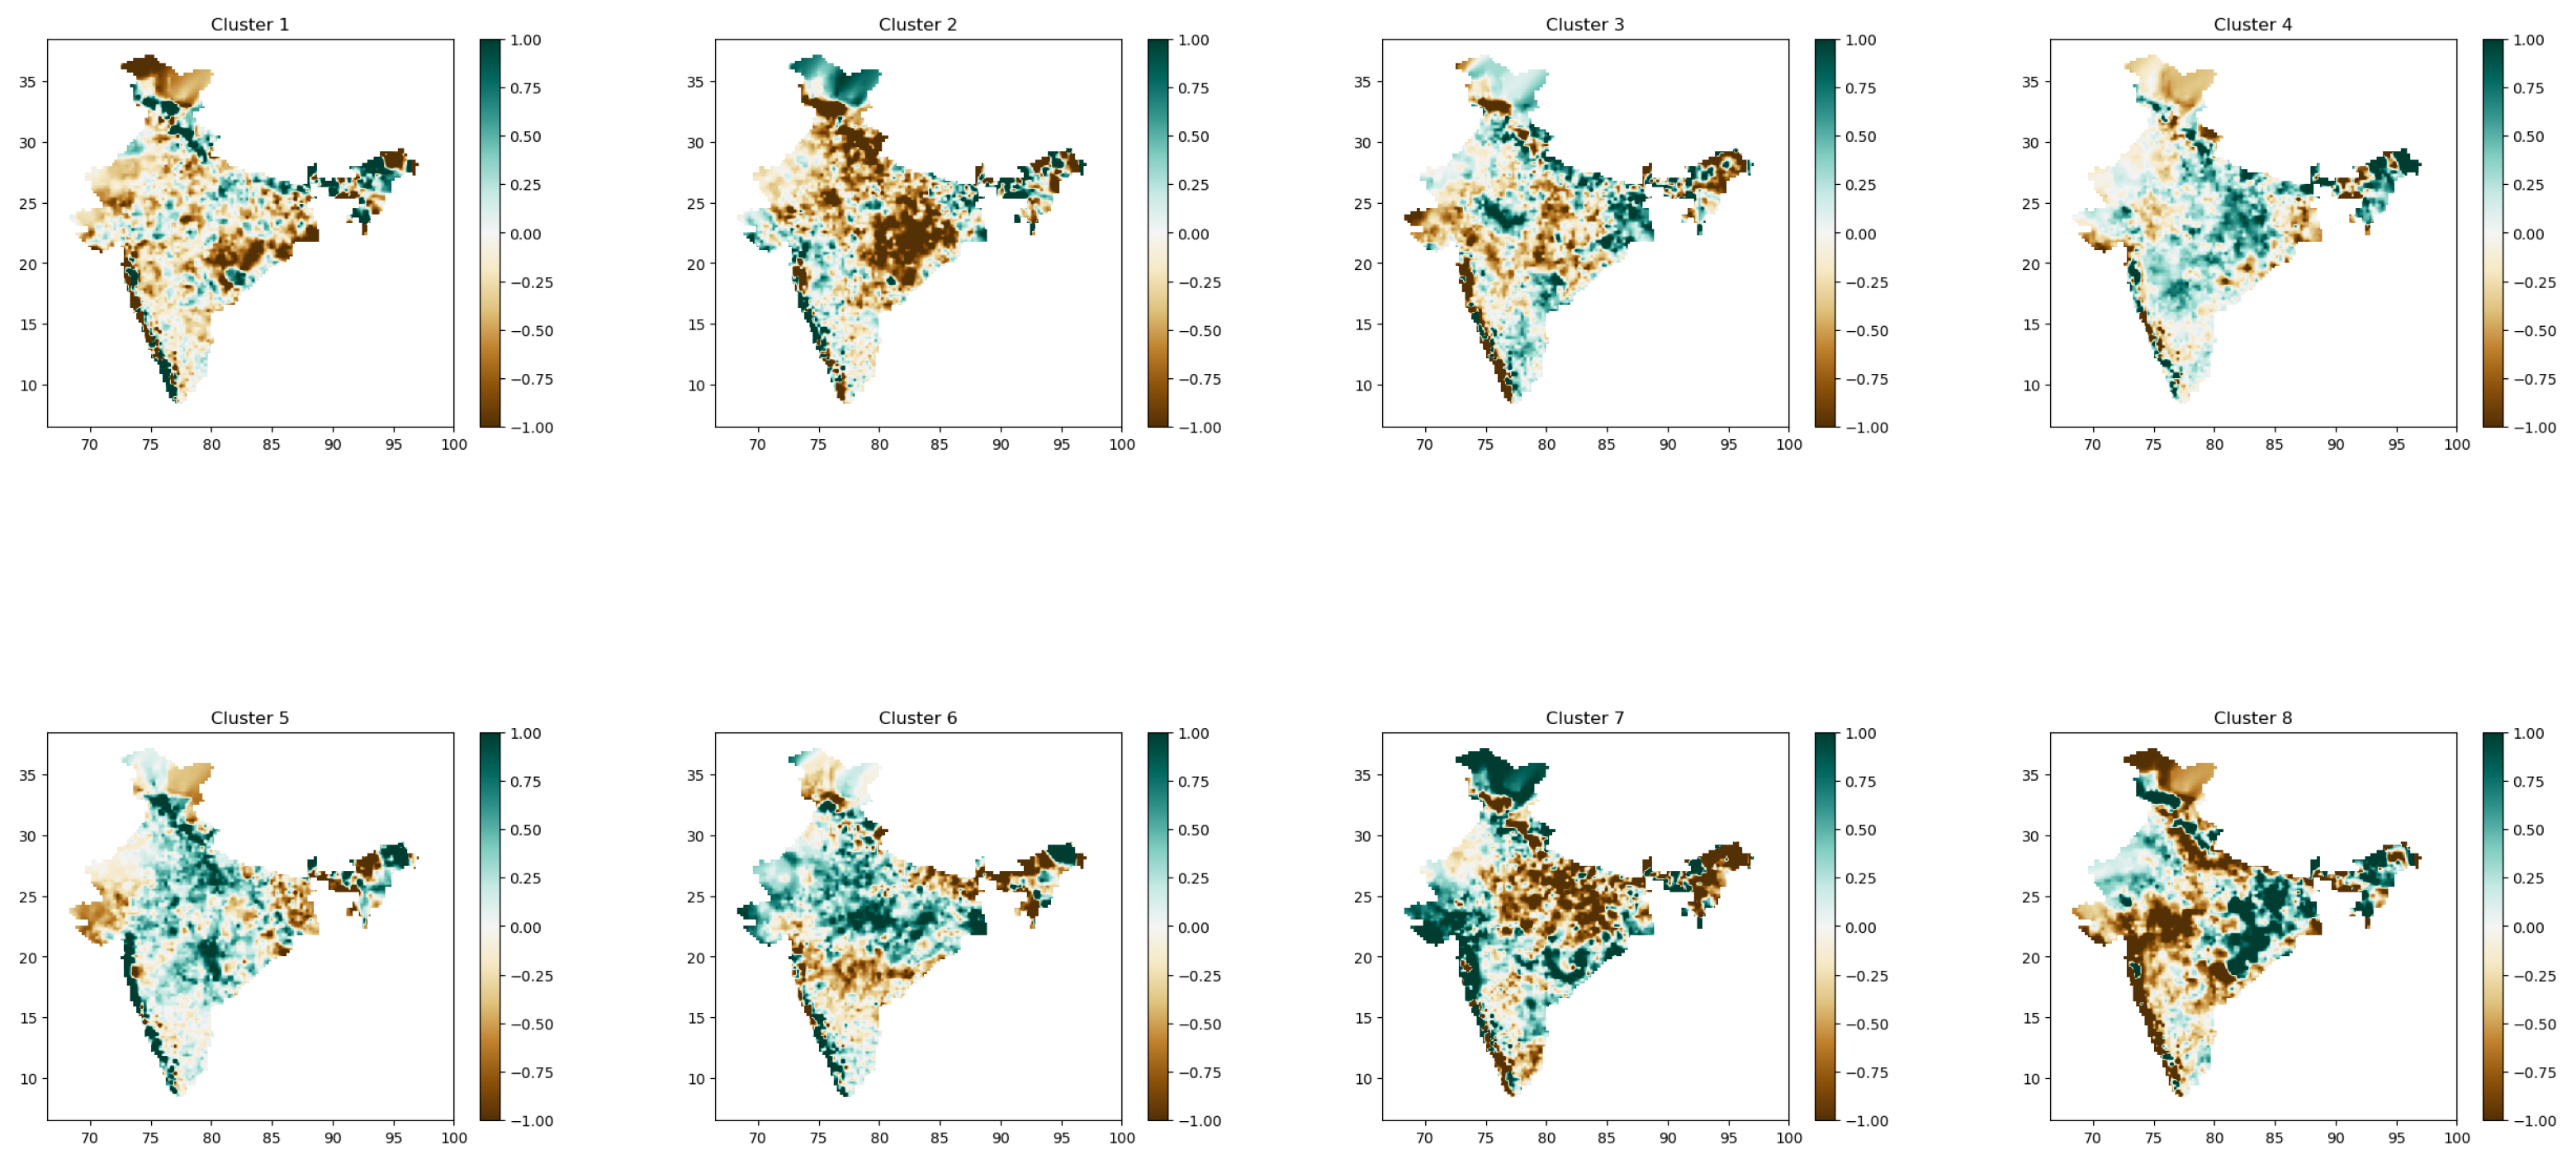

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(40, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [51]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [53]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

In [54]:
print("Predicted Cluster",y_pred)
print("Actual Cluster",y_array)

Predicted Cluster [4 4 3 6 0 1 5 2 0 3 4 6 7]
Actual Cluster [4 4 3 6 0 1 5 2 0 3 4 6 7]


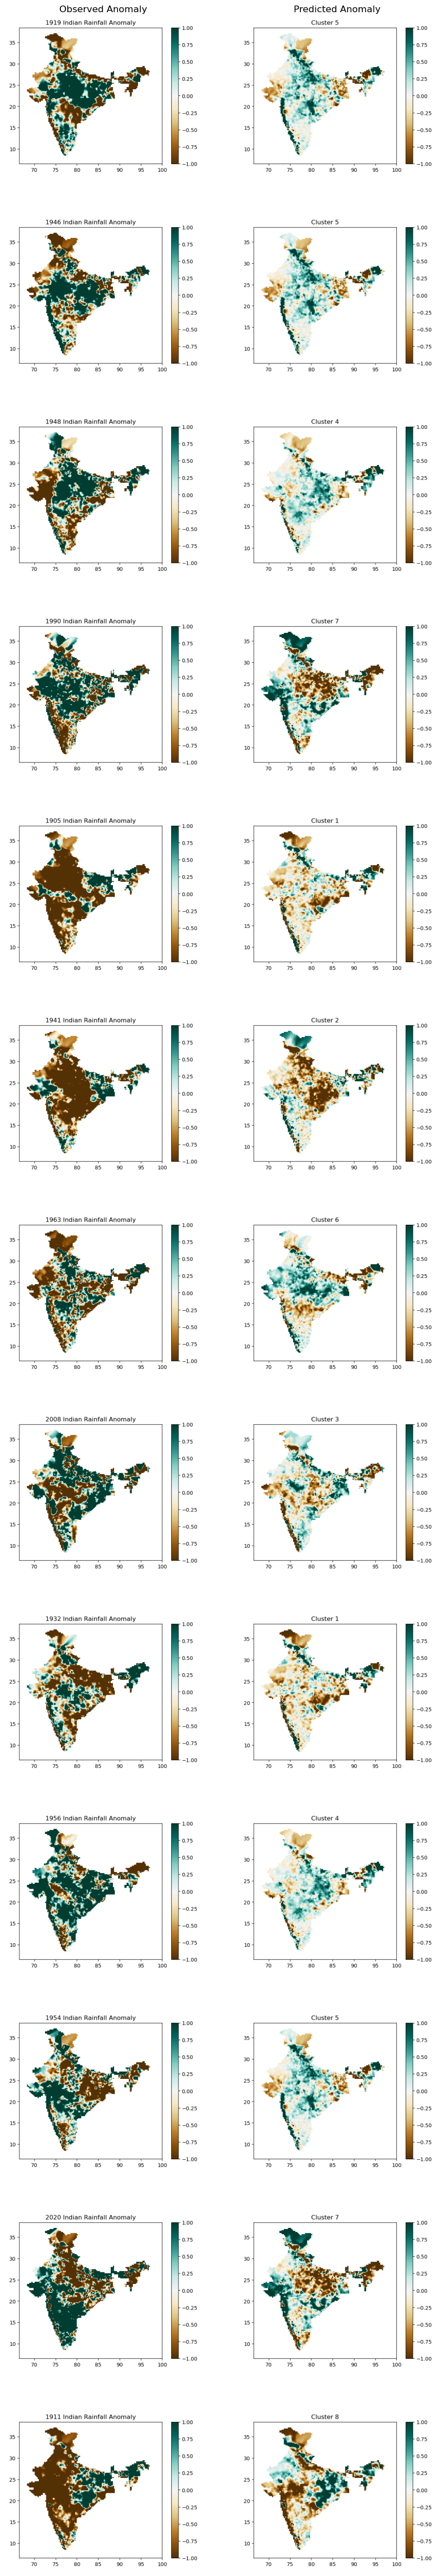

In [56]:
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
fl=0

for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        if(fl==1):
            ax.set_title(f'Predicted Anomaly')
            fl=2
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        if(fl==0):
            ax.set_title('Observed Anomaly')
            fl=1
        
# plt.savefig('SSTA 8 Clusters Random Forest Train Test Split Prediction.png')


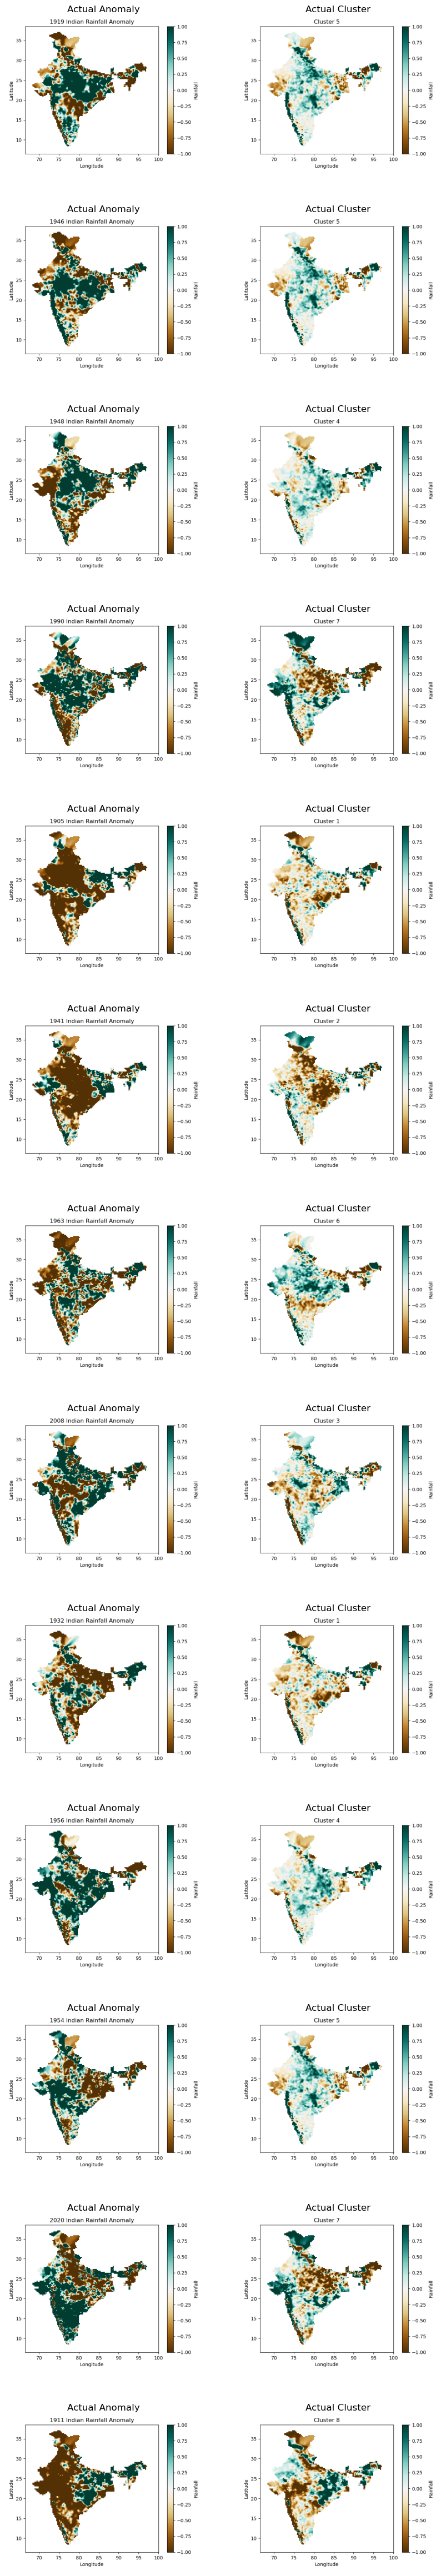

In [19]:
#Actual Years
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

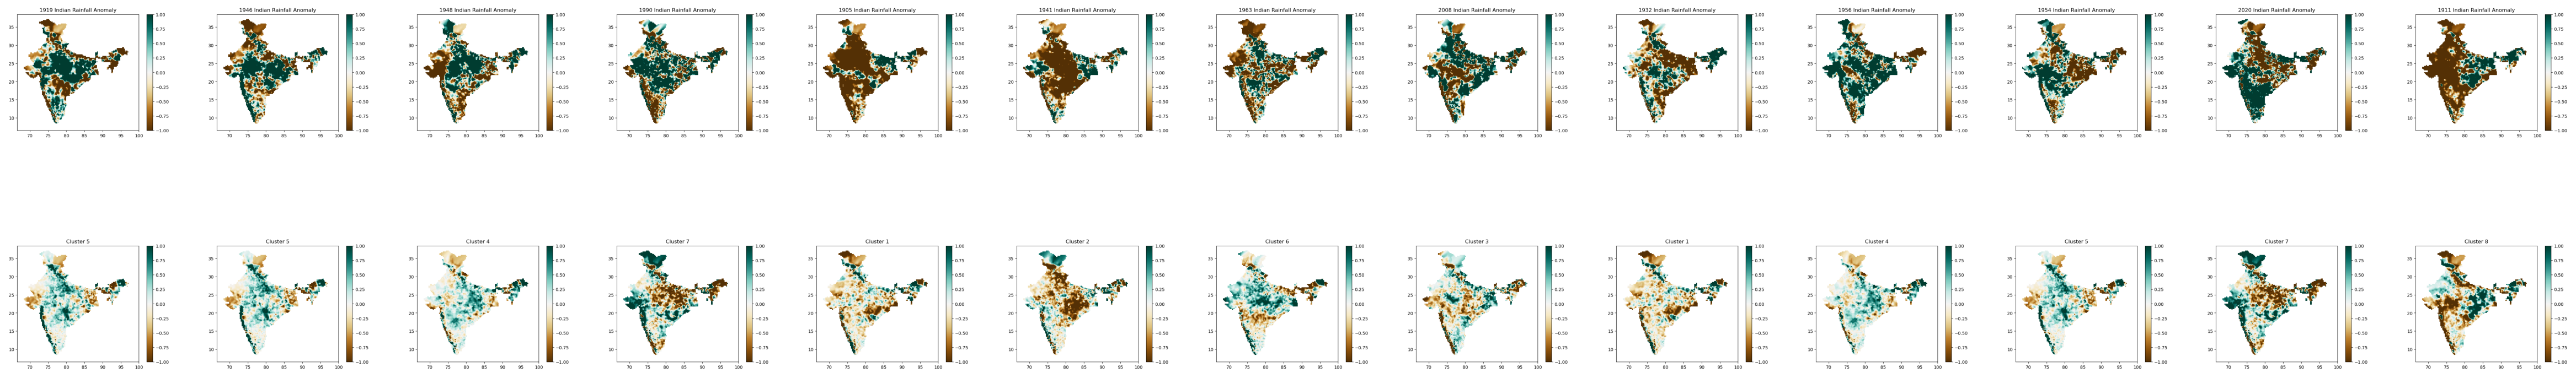

In [66]:
fig, axes = plt.subplots(2, 13, figsize=(60, 10)) 
j=0
k=0
l=0
for i, ax in enumerate(axes.ravel()):
    
   
    if(i>=0 and i<13):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
#         ax.set_title('Observed Anomaly')
        j+=1
        
    elif(i>=13 and i<26):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
#         ax.set_title(f'Predicted Anomaly')
        k+=1
#     elif(i>=26):
#         pred_clus=y_array[l]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Actual Cluster')
#         l+=1
        
#     print(i,j,k,l)

plt.savefig('SSTA 8 Clusters Random Forest Train Test Split Prediction.png')